In [19]:
import cv2
import torch
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

In [38]:
print("loading model")
model_type = "DPT_Hybrid"
midas = torch.hub.load("intel-isl/MiDaS", model_type)

loading model


Using cache found in /Users/pierreadorni/.cache/torch/hub/intel-isl_MiDaS_master
/Users/pierreadorni/Documents/depth-estimation/venv/lib/python3.9/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_hybrid_384.pt" to /Users/pierreadorni/.cache/torch/hub/checkpoints/dpt_hybrid_384.pt
100%|██████████| 470M/470M [03:47<00:00, 2.16MB/s] 


In [45]:
print("setting device")
device = torch.device("cpu")
midas.to(device)
midas.eval()

setting device


DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): HybridEmbed(
        (backbone): ResNetV2(
          (stem): Sequential(
            (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
            (norm): GroupNormAct(
              32, 64, eps=1e-05, affine=True
              (drop): Identity()
              (act): ReLU(inplace=True)
            )
            (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
          )
          (stages): Sequential(
            (0): ResNetStage(
              (blocks): Sequential(
                (0): Bottleneck(
                  (downsample): DownsampleConv(
                    (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (norm): GroupNormAct(
                      32, 256, eps=1e-05, affine=True
                      (drop): Identity()
                      (act): Identit

In [39]:
print("loading transforms")
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform

loading transforms


Using cache found in /Users/pierreadorni/.cache/torch/hub/intel-isl_MiDaS_master


(-0.5, 2963.5, 1999.5, -0.5)

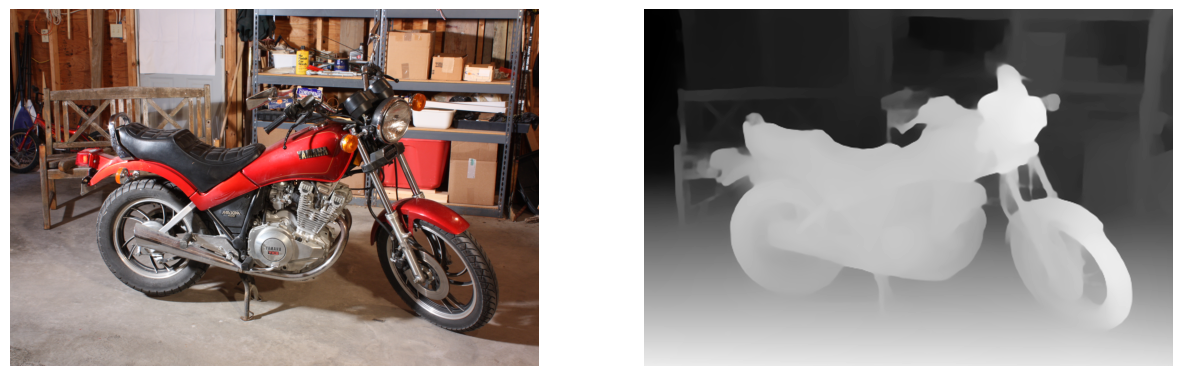

In [46]:
img = io.imread('../noml/im0.png')
input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(img)
ax[0].axis("off")
ax[1].imshow(output, cmap='gray')
ax[1].axis("off")

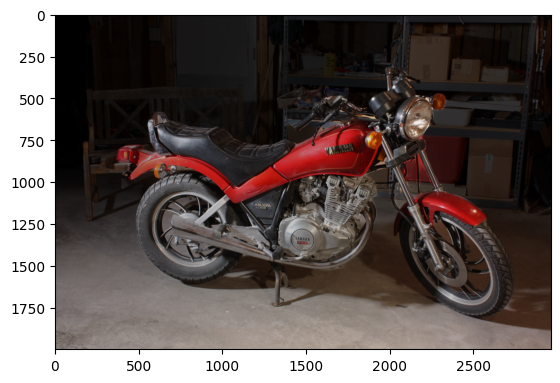

In [41]:
# show image with depths as opacity
plt.imshow((img * np.repeat((output / output.max())[:, :, np.newaxis], 3, axis=2)).astype(int))